In [5]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from os import getcwd

# Getting the data & basic stats

In [265]:
df_data = pd.read_csv(getcwd() + "\\train.csv", 
                    index_col='AnimalID')

In [266]:
df_data.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [267]:
df_data.describe()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,5,16,2,5,44,1380,366
top,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,10769,7816,15595,9779,3969,8810,2824


In [268]:
df_data.index.nunique()

26729

# Filtering null data

In [269]:
print(df_data.shape)
df_data = df_data.loc[df_data['SexuponOutcome'].notnull()]
print(df_data.shape)
df_data = df_data.loc[df_data['AgeuponOutcome'].notnull()]
print(df_data.shape)

(26729, 9)
(26728, 9)
(26710, 9)


Overall 19 null values filtered, 1 from sex, rest from age. not a major data loss.

In [270]:
df_data.AnimalType.value_counts()

Dog    15593
Cat    11117
Name: AnimalType, dtype: int64

# Outcome vs other variables

In [271]:
pd.crosstab(index=df_data.OutcomeType, columns=df_data.SexuponOutcome,normalize='columns')

SexuponOutcome,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
OutcomeType,,,,,
Adoption,0.057934,0.044899,0.534001,0.588049,0.000000
Died,0.015982,0.022450,0.001943,0.002041,0.022957
Euthanasia,0.114441,0.134982,0.035177,0.026307,0.092746
Return_to_owner,0.085902,0.135550,0.229778,0.198208,0.011019
Transfer,0.725742,0.662120,0.199100,0.185395,0.873278


Not suprisingly neutered animals has higher chance to survive both by adoption or by return of owner.
Unneutered animals require additional 'investment' from the owner so they are less wanted

In [272]:
pd.crosstab(index=df_data.SexuponOutcome, columns=df_data.OutcomeType,normalize='columns')

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
SexuponOutcome,,,,,
Intact Female,0.018850,0.284264,0.258210,0.062905,0.270359
Intact Male,0.014672,0.401015,0.305860,0.099687,0.247714
Neutered Male,0.484910,0.096447,0.221507,0.469592,0.206996
Spayed Female,0.481567,0.091371,0.149388,0.365308,0.173825
Unknown,0.000000,0.126904,0.065035,0.002508,0.101106


In [273]:
pd.crosstab(index=df_data.OutcomeType, columns=df_data.AnimalType,normalize='columns')

AnimalType,Cat,Dog
OutcomeType,,
Adoption,0.384276,0.416661
Died,0.013223,0.003207
Euthanasia,0.063776,0.054127
Return_to_owner,0.044976,0.274803
Transfer,0.493748,0.251202


Interestingly, owners are more likely to return to thier cats, while adopters slightly favor dogs

# Outcome vs age

In [274]:
df_data.AgeuponOutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [275]:
age_years_d = [1, 2, 21/365, 1/12, 5/12, 4, 3/12, 12/365, 2/12, 10/12, 6/12,5, 7, 3, 4/12, 12, 9, 6, 7/365, 11, 28/365, 7/12, 8, 
       11/12, 4/365, 9/12, 8/12, 15, 10, 7/365, 0, 14, 3/365, 6/365, 5/365, 35/365, 2/365, 16, 1/365, 13, 17, 18, 19, 20]
age_years = zip(df_data.AgeuponOutcome.unique(), age_years_d)
years_fixed = {k:v for k,v in age_years}
df_data['AgeNumber'] = df_data.AgeuponOutcome.map(years_fixed)

In [276]:
df_data.OutcomeType.unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

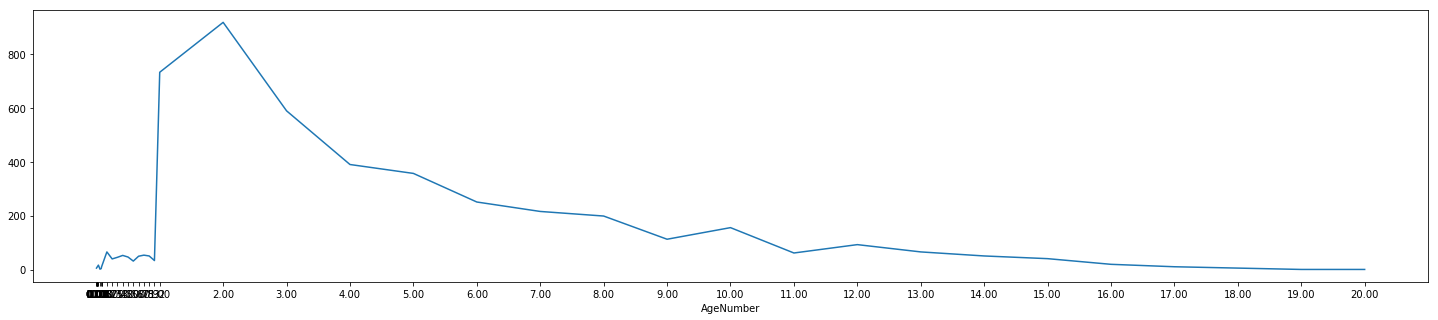

In [277]:
df_adopted = df_data.loc[df_data['OutcomeType']=='Return_to_owner']
plt = df_adopted.groupby('AgeNumber')['AgeNumber'].count().plot(figsize =(25,5), xticks=df_data.AgeNumber.unique())

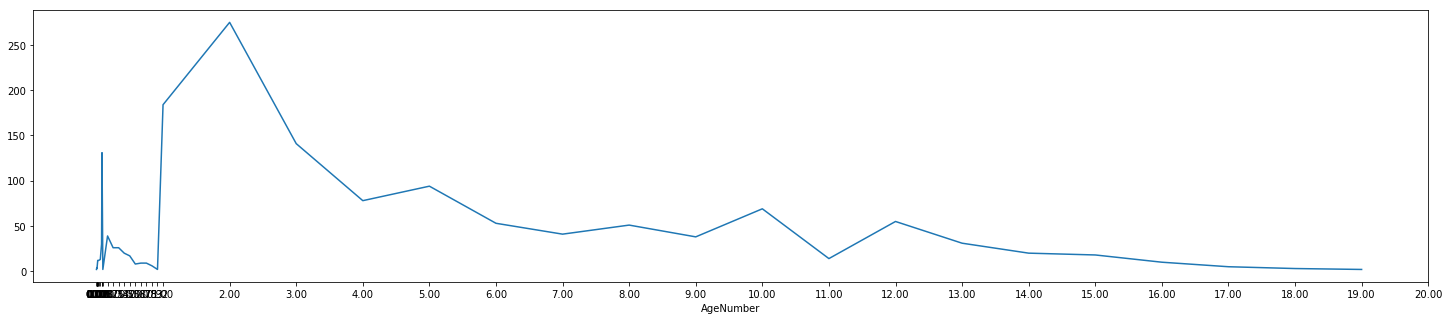

In [278]:
df_adopted = df_data.loc[df_data['OutcomeType']=='Euthanasia']
plt = df_adopted.groupby('AgeNumber')['AgeNumber'].count().plot(figsize =(25,5), xticks=df_data.AgeNumber.unique())

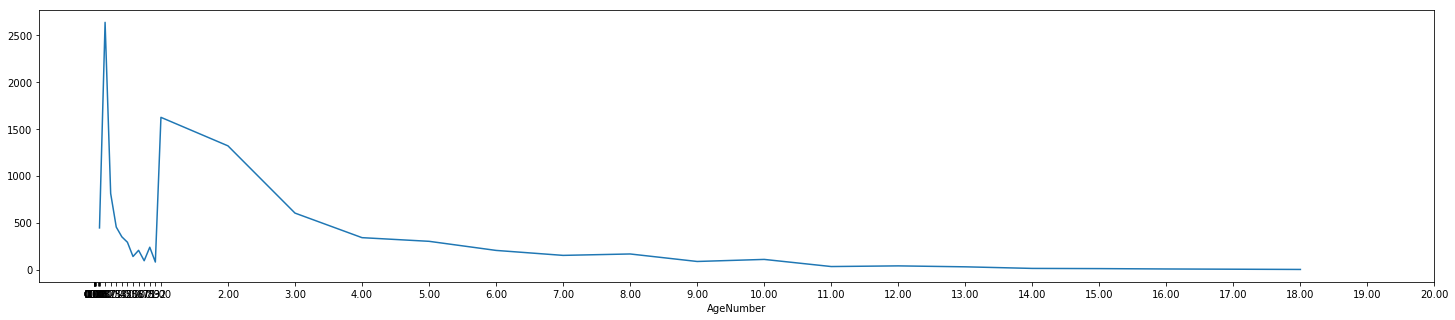

In [279]:
df_adopted = df_data.loc[df_data['OutcomeType']=='Adoption']
plt = df_adopted.groupby('AgeNumber')['AgeNumber'].count().plot(figsize =(25,5), xticks=df_data.AgeNumber.unique())

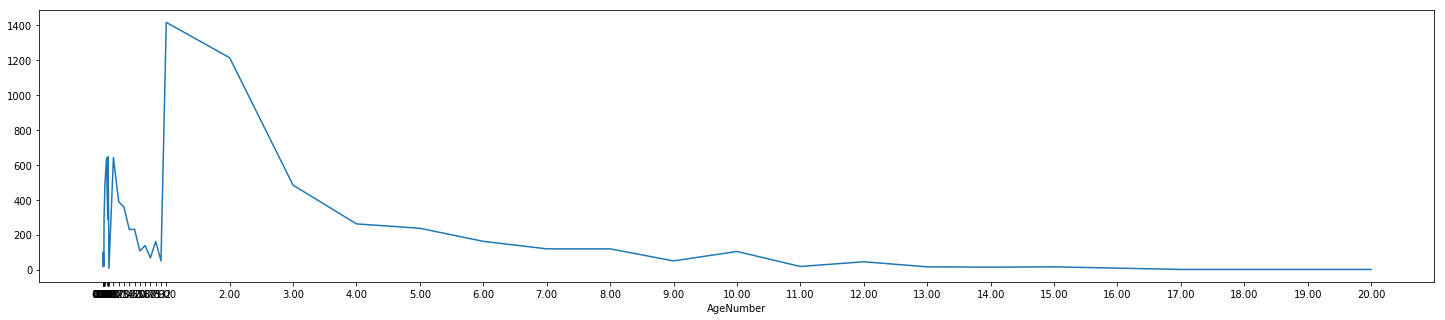

In [280]:
df_adopted = df_data.loc[df_data['OutcomeType']=='Transfer']
plt = df_adopted.groupby('AgeNumber')['AgeNumber'].count().plot(figsize =(25,5), xticks=df_data.AgeNumber.unique())

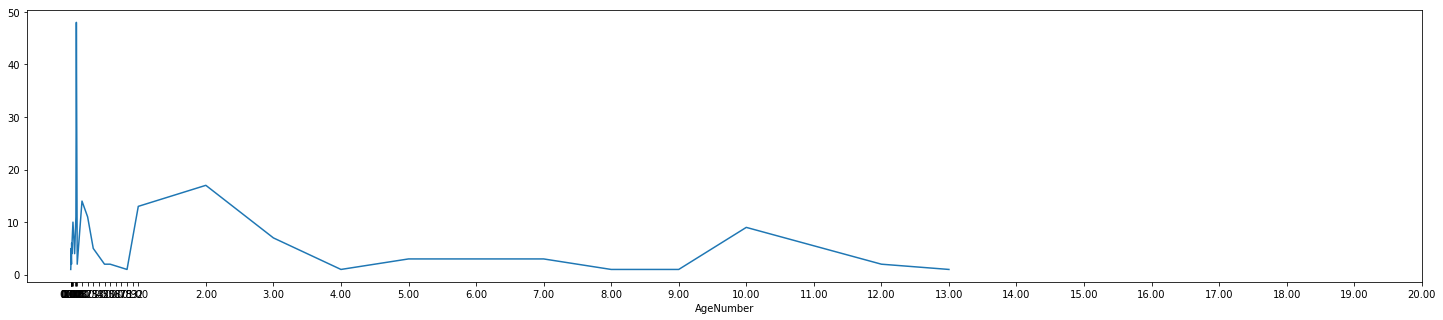

In [281]:
df_adopted = df_data.loc[df_data['OutcomeType']=='Died']
plt = df_adopted.groupby('AgeNumber')['AgeNumber'].count().plot(figsize =(25,5), xticks=df_data.AgeNumber.unique())

Younger animals (1y>) have a higher chance to be adopted, animals in age of 1y-3y have a higher chance to return to owner (probably because in 1st year they were with the owner.
Euthanasia is suprisingly matching the trend (i'd expect younger animals to be more healthy)
All outcomes have a peak in the 10th year which can probably relate to some procedures in the shelter at the age of 10.

# SubOutcome 

In [282]:
pd.crosstab(index=[df_data.OutcomeType,df_data.OutcomeSubtype],columns='count')

col_0                            count
OutcomeType OutcomeSubtype            
Adoption    Barn                     1
            Foster                1800
            Offsite                165
Died        At Vet                   4
            Enroute                  8
            In Foster               52
            In Kennel              114
            In Surgery               3
Euthanasia  Aggressive             320
            Behavior                86
            Court/Investigation      6
            Medical                 66
            Rabies Risk             74
            Suffering             1000
Transfer    Barn                     1
            Partner               7816
            SCRP                  1583

For every Outcome there is atleast 1 very major SubOutcome. (Adopton-foster/Offsite, Died-Kennel/Foster, Euthanasia-suffering/aggressive, Transfer - Partner/SCRP)

In [283]:
df_data['named_animal'] = np.where(df_data['Name'].isnull(),'No name','Named')

In [284]:
pd.crosstab(index=df_data.named_animal, columns=df_data.OutcomeType,normalize='columns')

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
named_animal,,,,,
Named,0.844182,0.390863,0.476497,0.968025,0.478099
No name,0.155818,0.609137,0.523503,0.031975,0.521901


In [285]:
df_data['Mixed'] = df_data.Breed.str.contains('Mix')

In [286]:
df_data.groupby('Mixed').count()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeNumber,named_animal
Mixed,,,,,,,,,,,
False,3690,4430,4430,1653,4430,4430,4430,4430,4430,4430,4430
True,15347,22280,22280,11446,22280,22280,22280,22280,22280,22280,22280


In [287]:
df_data['TwoColors'] = df_data.Color.str.contains('/')

In [288]:
df_data['Twobreeds'] = df_data.Breed.str.contains('/')

In [289]:
df_data['IsMale'] = df_data.SexuponOutcome.str.contains('Male')

In [290]:
df_data['IsIntact'] = df_data.SexuponOutcome.str.contains('Intact')

In [291]:
df_data['Puppy'] = df_data.AgeNumber <=1

In [292]:
df_data.groupby('TwoColors')['Name'].count()

TwoColors
False     8433
True     10604
Name: Name, dtype: int64

Added 2 varibles - if the animal is named or not and if it isa mixed animal

In [293]:
# import urllib2
# import re 
import requests 
from bs4 import BeautifulSoup as bs

In [294]:
url = 'https://en.wikipedia.org/wiki/List_of_dog_breeds_recognized_by_the_American_Kennel_Club'

In [295]:
resp = requests.get(url)

In [296]:
soup = bs(resp.text,'lxml')

In [297]:
all_tables=soup.find_all('li')
doglist = [i.text for i in all_tables]
doglist_split = [i.split(',') for i in doglist]


In [298]:
df_doglist = pd.DataFrame(doglist_split,columns=['Dog','DogGroup','col3','col4'])

In [299]:
df_doglist.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], inplace=True)
df_doglist.drop(['col3','col4'],axis=1,inplace=True)

In [300]:
df_doglist.head()

,Dog,DogGroup
26,Affenpinscher,Toy
27,Afghan Hound,Hound
28,Airedale Terrier,Terrier
29,Akita,Working
30,Alaskan Malamute,Working


In [308]:
df_data = df_data.merge(df_doglist, left_on='Breed', right_on='Dog', how='left')

In [312]:
df_data = df_data.drop('Dog',axis=1)

In [320]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix,  classification_report 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,  export_graphviz 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings

In [341]:
df_data_vars = df_data.drop(['Name','DateTime','OutcomeSubtype','AgeuponOutcome','Breed','SexuponOutcome','DogGroup'], axis=1)
df_data_vars.head(1)

,OutcomeType,AnimalType,Color,AgeNumber,named_animal,Mixed,TwoColors,Twobreeds,IsMale,IsIntact,Puppy
0,Return_to_owner,Dog,Brown/White,1.0,Named,True,True,False,True,False,True


DogGroup was not included in model as itseverly damaged results (5-10%) probably due to low match amount from wiki database
splitting the breed into 2 columns according to breed may improve results

In [342]:
df_data_dummies = pd.get_dummies(df_data_vars, columns=['AnimalType','Color','AgeNumber','named_animal','Mixed','TwoColors'
                                                        ,'Twobreeds','Puppy','IsMale','IsIntact'])

In [343]:
data_train, data_test = split(df_data_dummies, train_size=0.8) 

C:\Users\ori\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [344]:
X_train = data_train.drop(['OutcomeType'], axis=1)
y_train = data_train['OutcomeType']

In [345]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [346]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [347]:
data_train['predictedDTC'] = model.predict(X_train)

C:\Users\ori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [348]:
print(model.score(X_train, y_train))

0.6628603519281168


In [349]:
X_test = data_test.drop(['OutcomeType'], axis=1)
y_test = data_test['OutcomeType']

In [350]:
print(model.score(X_test, y_test))

0.6301010857356795


In [351]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
data_train = data_train.drop('predictedDTC', axis=1)
data_train['predictedDTC'] = model2.predict(X_train)
print(model2.score(X_train, y_train))
X_test = data_test.drop(['OutcomeType'], axis=1)
y_test = data_test['OutcomeType']
print(model2.score(X_test, y_test))

0.6447491576188693
0.6280419318607263


In [352]:
def evaluate_model(**kwargs):
    
    modelkw = DecisionTreeClassifier(**kwargs).fit(X_train, y_train)

    train_acc = accuracy_score(
        y_true=data_train.OutcomeType,
        y_pred=modelkw.predict(X_train))
    test_acc = accuracy_score(
        y_true=data_test.OutcomeType,
        y_pred=modelkw.predict(data_test.drop('OutcomeType', axis=1)))
    
    print("Train accuracy: {:.4f}".format(train_acc))
    print("Test accuracy : {:.4f}".format(test_acc))
    print()

In [353]:
evaluate_model(max_depth=8, min_samples_split=10, min_samples_leaf=10)
evaluate_model(max_depth=9, min_samples_split=10, min_samples_leaf=10)
evaluate_model(max_depth=10, min_samples_split=10, min_samples_leaf=10)
evaluate_model(max_depth=11, min_samples_split=10, min_samples_leaf=10)

Train accuracy: 0.6490
Test accuracy : 0.6329

Train accuracy: 0.6513
Test accuracy : 0.6325

Train accuracy: 0.6532
Test accuracy : 0.6353

Train accuracy: 0.6543
Test accuracy : 0.6338



In [354]:
evaluate_model(max_depth=9, min_samples_split=70, min_samples_leaf=8)
evaluate_model(max_depth=9, min_samples_split=70, min_samples_leaf=8)
evaluate_model(max_depth=9, min_samples_split=70, min_samples_leaf=8)
evaluate_model(max_depth=9, min_samples_split=70, min_samples_leaf=8)

Train accuracy: 0.6513
Test accuracy : 0.6327

Train accuracy: 0.6513
Test accuracy : 0.6327

Train accuracy: 0.6513
Test accuracy : 0.6327

Train accuracy: 0.6513
Test accuracy : 0.6327



In [355]:
evaluate_model(max_depth=10, min_samples_split=9, min_samples_leaf=8)
evaluate_model(max_depth=10, min_samples_split=10, min_samples_leaf=8)
evaluate_model(max_depth=10, min_samples_split=11, min_samples_leaf=8)
evaluate_model(max_depth=10, min_samples_split=70, min_samples_leaf=8)

Train accuracy: 0.6545
Test accuracy : 0.6357

Train accuracy: 0.6545
Test accuracy : 0.6357

Train accuracy: 0.6545
Test accuracy : 0.6357

Train accuracy: 0.6530
Test accuracy : 0.6348



In [123]:
evaluate_model(max_depth=10, min_samples_split=70, min_samples_leaf=8)

Train accuracy: 0.6530
Test accuracy : 0.6447

